Problem statement :
The objective of this analysis is to forecast the daily temperatures for major Indian cities based on historical data(1995 - 2019).  The goal is to develop accurate forecasting Machine Learning Model to predict the future temperature trends. Through which we can understand the Climate patterns, Identify Seasonal Variations and provide some  valuable insights about weather forecasting.



Dataset Reference : https://www.kaggle.com/datasets/sandeeptudu/indian-major-cities-daily-temperatures-1995-2019

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_csv("tempr.csv")

In [42]:
temp.head()

,month,day,year,kolkata,mumbai,chennai,delhi
date,,,,,,,
1995-01-01,1,1,1995,63.0,71.8,72.4,50.7
1995-01-02,1,2,1995,61.4,72.0,73.5,52.1
1995-01-03,1,3,1995,60.6,70.3,72.6,53.8
1995-01-04,1,4,1995,61.3,69.7,75.2,53.7
1995-01-05,1,5,1995,62.3,71.3,74.8,54.5


# Cleaning The Data
# Removing NA Values

In [3]:
# Create a variable to store column names, replace the 'na' values in the dataset with backward fill method
cities = temp.columns[3:]
#city = []
print("Cities:")
#for ct in cities:
#    city.append(ct)
#print(city,cities)

## type conversion of all the cities
#for ct in city:
for ct in cities:
    temp[ct]= temp[ct].replace('na', np.nan).astype(float).fillna(method='bfill',axis=0)
print(temp.info())

Cities:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9132 entries, 0 to 9131
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    9132 non-null   int64  
 1   day      9132 non-null   int64  
 2   year     9132 non-null   int64  
 3   kolkata  9132 non-null   float64
 4   mumbai   9132 non-null   float64
 5   chennai  9132 non-null   float64
 6   delhi    9132 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 499.5 KB
None


# Data Description (Mean , Variance)

In [4]:
#Data description
temp.describe(include='float64')

,kolkata,mumbai,chennai,delhi
count,9132.000000,9132.000000,9132.000000,9132.000000
mean,79.729961,82.113436,83.413316,77.077803
std,7.953355,3.857229,4.724707,13.242168
min,52.900000,63.400000,69.700000,43.900000
25%,74.300000,80.000000,79.400000,65.400000
50%,82.400000,82.600000,83.800000,80.800000
75%,85.600000,84.700000,87.000000,87.600000
max,96.800000,92.600000,97.900000,103.700000


# Skewness and Kurtosis of data

In [5]:
# Skew & Kurtosis of the dataset
for ct in cities:
  print(f"Skewness of {ct} is",temp[ct].skew())
  print(f"Kurtosis of {ct} is",temp[ct].kurtosis())

Skewness of kolkata is -0.7876175961354803
Kurtosis of kolkata is -0.3529752644031747
Skewness of mumbai is -0.6766424560564482
Kurtosis of mumbai is 0.6550424051751733
Skewness of chennai is 0.016752632951877473
Kurtosis of chennai is -0.8217423673510247
Skewness of delhi is -0.3815884136644752
Kurtosis of delhi is -1.0123556757179435


# Creating a Date Column By combining Day , Month , Year

In [6]:
#Add a column 'date' combining the values in month, day & year
temp['date'] = pd.to_datetime(temp[['month','day','year']])

In [7]:
temp.head()

,month,day,year,kolkata,mumbai,chennai,delhi,date
0,1,1,1995,63.0,71.8,72.4,50.7,1995-01-01
1,1,2,1995,61.4,72.0,73.5,52.1,1995-01-02
2,1,3,1995,60.6,70.3,72.6,53.8,1995-01-03
3,1,4,1995,61.3,69.7,75.2,53.7,1995-01-04
4,1,5,1995,62.3,71.3,74.8,54.5,1995-01-05


In [8]:
city_avg = temp.groupby('month')[['kolkata','mumbai','chennai','delhi']].mean()

# Average Temprature Per Month

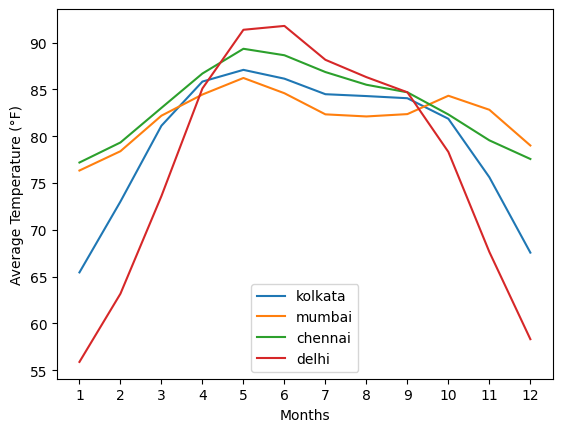

In [9]:
plt.plot(city_avg.index, city_avg.values)
plt.xticks(np.arange(1,13))
plt.xlabel('Months')
plt.ylabel('Average Temperature (°F)')
plt.legend(['kolkata','mumbai','chennai','delhi'])
plt.show()

# Min Temperature in Each City

In [10]:
from datetime import datetime
for city_cl in cities:
    min_temp_index = temp[city_cl].idxmin()
    min_recorded_temp = temp.loc[min_temp_index,[city_cl]]
    date_with_min_temp = temp.loc[min_temp_index, ['month', 'day', 'year']]
    date_formatted = datetime(int(date_with_min_temp['year']), int(date_with_min_temp['month']), int(date_with_min_temp['day'])).strftime('%m-%d-%Y')
    print(f"{city_cl}: Highest recorded temperature is {float(min_recorded_temp)}F on Date:{date_formatted}")

kolkata: Highest recorded temperature is 52.9F on Date:01-04-2018
mumbai: Highest recorded temperature is 63.4F on Date:02-07-2008
chennai: Highest recorded temperature is 69.7F on Date:12-06-2010
delhi: Highest recorded temperature is 43.9F on Date:01-06-2013


# Max Temperature in Each City

In [11]:
for city_cl in cities:
    max_temp_index = temp[city_cl].idxmax()
    max_recorded_temp = temp.loc[max_temp_index,[city_cl]]
    date_with_max_temp = temp.loc[max_temp_index, ['month', 'day', 'year']]
    date_formatted = datetime(int(date_with_max_temp['year']), int(date_with_max_temp['month']), int(date_with_max_temp['day'])).strftime('%m-%d-%Y')
    print(f"{city_cl}: Lowest recorded temperature is {float(max_recorded_temp)}F on Date:{date_formatted}")

kolkata: Lowest recorded temperature is 96.8F on Date:06-09-1998
mumbai: Lowest recorded temperature is 92.6F on Date:06-10-2014
chennai: Lowest recorded temperature is 97.9F on Date:05-28-1998
delhi: Lowest recorded temperature is 103.7F on Date:05-28-1998


In [12]:
max_temp_index = temp['kolkata'].idxmax()

In [13]:
max_temp_index

1255

In [14]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [15]:
month_year_wise_temp = temp.drop(['day'],axis=1)
month_year_wise_temp.head()

,month,year,kolkata,mumbai,chennai,delhi,date
0,1,1995,63.0,71.8,72.4,50.7,1995-01-01
1,1,1995,61.4,72.0,73.5,52.1,1995-01-02
2,1,1995,60.6,70.3,72.6,53.8,1995-01-03
3,1,1995,61.3,69.7,75.2,53.7,1995-01-04
4,1,1995,62.3,71.3,74.8,54.5,1995-01-05


In [16]:
month_year_wise_temp_grouped = month_year_wise_temp.groupby(['year','month'])
month_year_wise_temp_grouped.mean()

C:\Users\Anonymous\AppData\Local\Temp\ipykernel_12296\244387713.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_year_wise_temp_grouped.mean()


kolkata     mumbai    chennai      delhi
year month                                            
1995 1      64.341935  72.393548  75.590323  55.548387
     2      71.664286  76.214286  78.914286  62.367857
     3      80.322581  79.432258  82.174194  70.474194
     4      87.636667  84.120000  86.183333  83.113333
     5      87.132258  86.819355  86.645161  93.187097
...               ...        ...        ...        ...
2019 8      83.532258  82.912903  88.370968  88.051613
     9      82.696667  81.620000  85.206667  87.223333
     10     80.412903  84.287097  83.280645  80.322581
     11     75.126667  84.236667  82.520000  69.406667
     12     65.358065  81.635484  79.622581  54.532258

[300 rows x 4 columns]

In [17]:
grouped_temp = pd.DataFrame(month_year_wise_temp_grouped.mean())
grouped_temp=grouped_temp.reset_index()
grouped_temp

C:\Users\Anonymous\AppData\Local\Temp\ipykernel_12296\290941716.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_temp = pd.DataFrame(month_year_wise_temp_grouped.mean())


,year,month,kolkata,mumbai,chennai,delhi
0,1995,1,64.341935,72.393548,75.590323,55.548387
1,1995,2,71.664286,76.214286,78.914286,62.367857
2,1995,3,80.322581,79.432258,82.174194,70.474194
3,1995,4,87.636667,84.120000,86.183333,83.113333
4,1995,5,87.132258,86.819355,86.645161,93.187097
...,...,...,...,...,...,...
295,2019,8,83.532258,82.912903,88.370968,88.051613
296,2019,9,82.696667,81.620000,85.206667,87.223333
297,2019,10,80.412903,84.287097,83.280645,80.322581
298,2019,11,75.126667,84.236667,82.520000,69.406667


In [18]:
grouped_temp['day']= 1
grouped_temp['date1'] = pd.to_datetime(grouped_temp[['month','day','year']])
grouped_temp['date1'] = grouped_temp['date1'].dt.strftime('%b-%Y')
grouped_temp.drop('day',axis= 1,inplace= True)


In [19]:
grouped_temp['temp_month'] = grouped_temp['month'].astype(str)
grouped_temp

,year,month,kolkata,mumbai,chennai,delhi,date1,temp_month
0,1995,1,64.341935,72.393548,75.590323,55.548387,Jan-1995,1
1,1995,2,71.664286,76.214286,78.914286,62.367857,Feb-1995,2
2,1995,3,80.322581,79.432258,82.174194,70.474194,Mar-1995,3
3,1995,4,87.636667,84.120000,86.183333,83.113333,Apr-1995,4
4,1995,5,87.132258,86.819355,86.645161,93.187097,May-1995,5
...,...,...,...,...,...,...,...,...
295,2019,8,83.532258,82.912903,88.370968,88.051613,Aug-2019,8
296,2019,9,82.696667,81.620000,85.206667,87.223333,Sep-2019,9
297,2019,10,80.412903,84.287097,83.280645,80.322581,Oct-2019,10
298,2019,11,75.126667,84.236667,82.520000,69.406667,Nov-2019,11


In [20]:
def olsf(city):
  cityiols = ols(f'{city} ~ temp_month',data =grouped_temp ).fit()
  print(anova_lm(cityiols ,typ = 2))

# Dependency on Months Using anova


# Mumbai

In [21]:
olsf('mumbai')

                 sum_sq     df          F        PR(>F)
temp_month  2271.275957   11.0  89.127909  6.525013e-86
Residual     667.199922  288.0        NaN           NaN


# Delhi

In [22]:
olsf('delhi')

                  sum_sq     df           F         PR(>F)
temp_month  46246.442287   11.0  953.880395  2.688871e-219
Residual     1269.358245  288.0         NaN            NaN


# Kolkata

In [23]:
olsf('kolkata')

                  sum_sq     df           F         PR(>F)
temp_month  15394.294282   11.0  688.974861  1.307655e-199
Residual      585.000465  288.0         NaN            NaN


# Chennai

In [24]:
olsf('chennai')

                 sum_sq     df           F         PR(>F)
temp_month  4929.501921   11.0  260.949789  1.184335e-142
Residual     494.590640  288.0         NaN            NaN


In [25]:
grouped_temp['Indan_temp'] = (grouped_temp['mumbai']+grouped_temp['kolkata'] +grouped_temp['chennai'] +grouped_temp['delhi'])/4

In [26]:
grouped_temp1= grouped_temp.groupby('year')['Indan_temp'].mean()


<Axes: xlabel='year'>

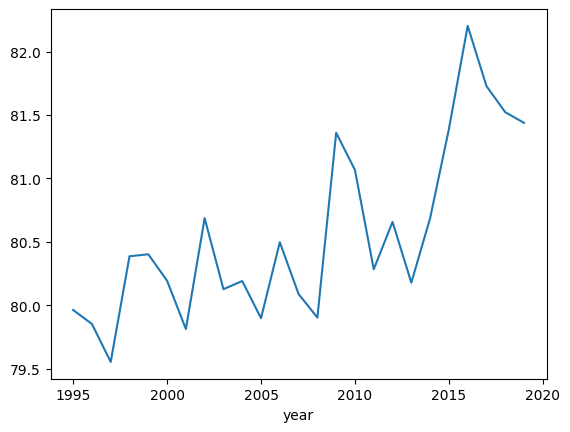

In [27]:
grouped_temp1.plot()

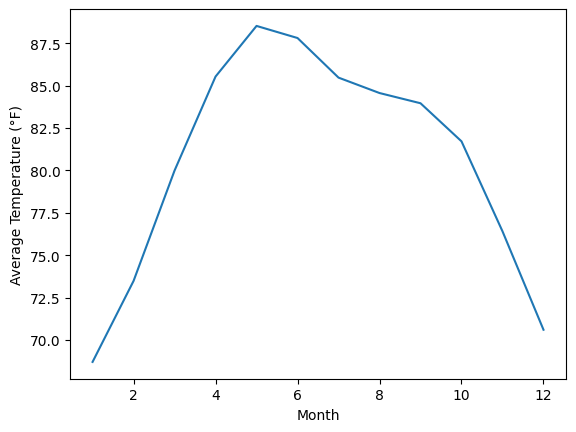

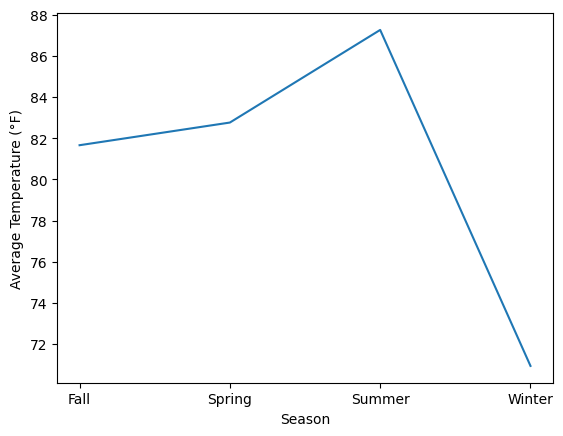

In [28]:
grouped_temp['season'] = grouped_temp['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4] else 'Summer' if x in [5,6, 7] else 'Fall')

# Calculate the average temperature for each month and season
average_temperatures_by_month = grouped_temp.groupby('month')['Indan_temp'].mean()
average_temperatures_by_season = grouped_temp.groupby('season')['Indan_temp'].mean()

# Plot the average temperature for each month and season
plt.plot(average_temperatures_by_month.index, average_temperatures_by_month.values)
plt.xlabel('Month')

plt.ylabel('Average Temperature (°F)')
plt.show()

plt.plot(average_temperatures_by_season.index, average_temperatures_by_season.values)
plt.xlabel('Season')
plt.ylabel('Average Temperature (°F)')
plt.show()

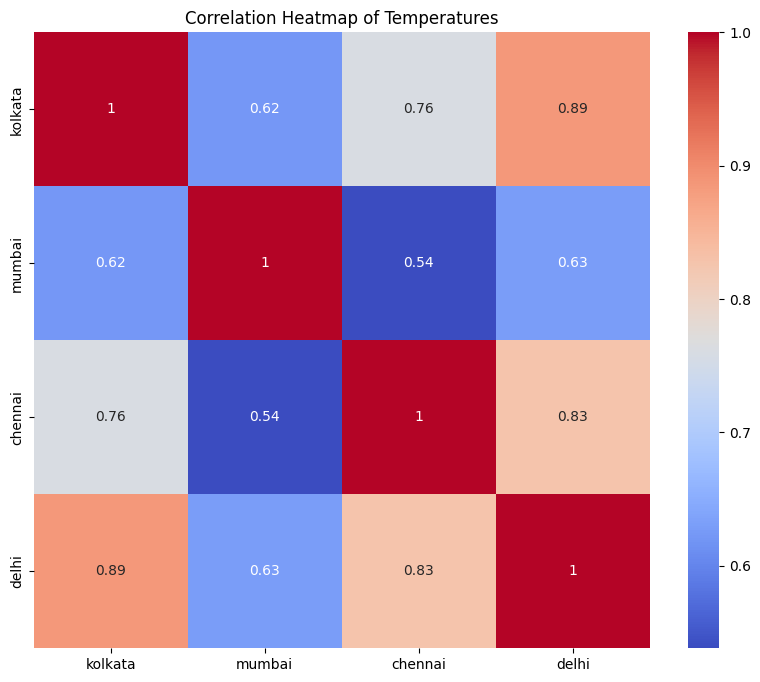

In [29]:
corr_matrix = temp[cities].corr()
plt.figure(figsize=(10, 8))
# Create the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Temperatures')
plt.show()

In [30]:
from scipy import stats

In [31]:
stats.ttest_rel(temp['mumbai'],temp['kolkata'],alternative='less')

# compare the temp 
# alternative hypothesis : less -- avg temp of mumbai is less than that of kolkata

TtestResult(statistic=36.032425554131045, pvalue=1.0, df=9131)

In [32]:
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

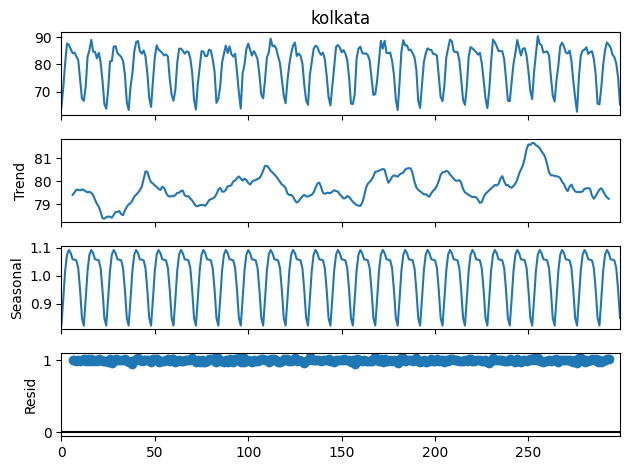

In [33]:
# seasonal_decompose : decompose time series data in to the component
# 1. trend 2. Seasonal 3. Residuals 
series = grouped_temp['kolkata']
result = seasonal_decompose(series,model='multiplicative',period=12)
result.plot()
plt.show()

# caputures patterns and variations 

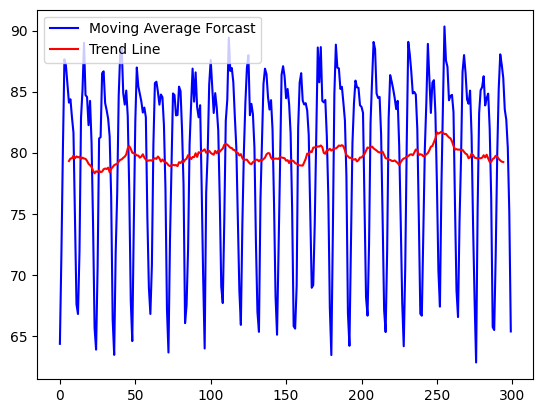

In [34]:
# moving Average : it gives a smoothning trend line between temperature data
y =  grouped_temp['kolkata']
fcast = y.rolling(12,center=True).mean()
plt.plot(y,label ='Moving Average Forcast',color = 'blue')
plt.plot(fcast,label='Trend Line',color='red')
plt.legend(loc='best')
plt.show()


In [35]:
y_train = grouped_temp['kolkata'][:-12]
y_test = grouped_temp['kolkata'][-12:]


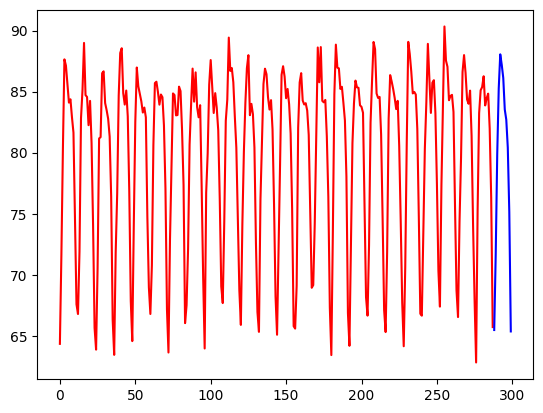

In [36]:
plt.plot(y_train,label='Train',color = 'red')
plt.plot(y_test,label='Test',color = 'blue')

In [37]:
# this method captures both the trend and seasonality and it provides a forecast future temp trend 
# Smoothining parameters
alpha = 0.5
beta = 0.07
phi = 0.1

fit3 = Holt(y_train, damped_trend=True,
            exponential=True).fit(smoothing_level=alpha,
                                      damping_trend= phi,
                                      smoothing_trend=beta)
fcast3 = fit3.forecast(len(y_test))
# exponenetial = True : allows the model to capture exponenetial growth and decay

C:\Users\Anonymous\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


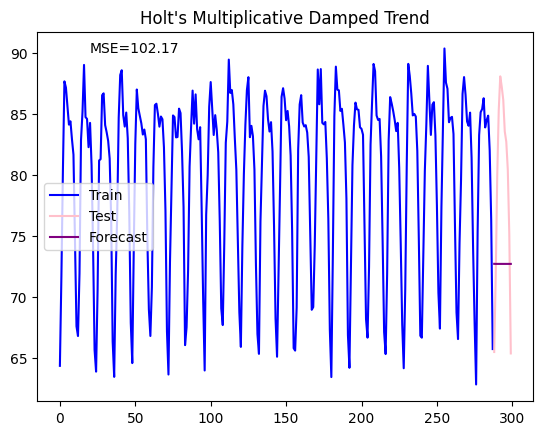

In [38]:
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast3.plot(color="purple", label='Forecast')
plt.text(20,90,"MSE="+str(round(mse(y_test, fcast3),2)))
plt.title("Holt's Multiplicative Damped Trend")
plt.legend(loc='best')
plt.show()
#mse : calculate accuracy between actual and forecast data

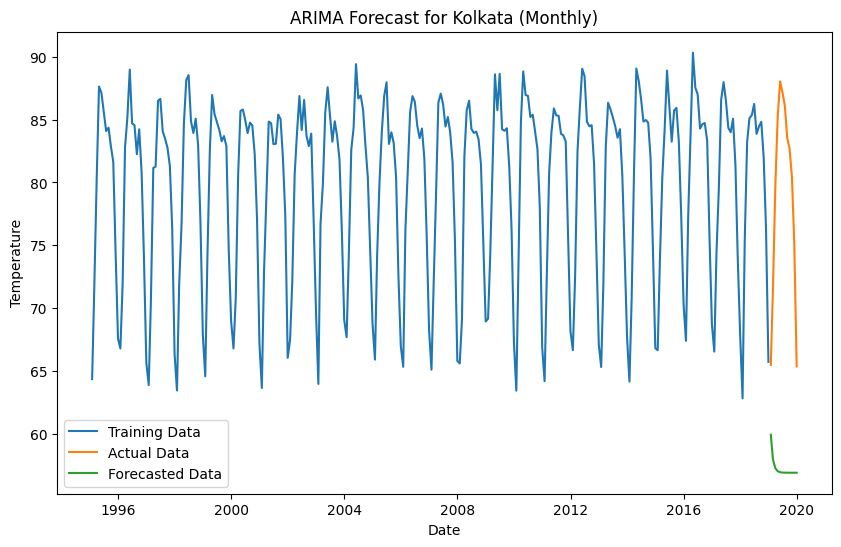

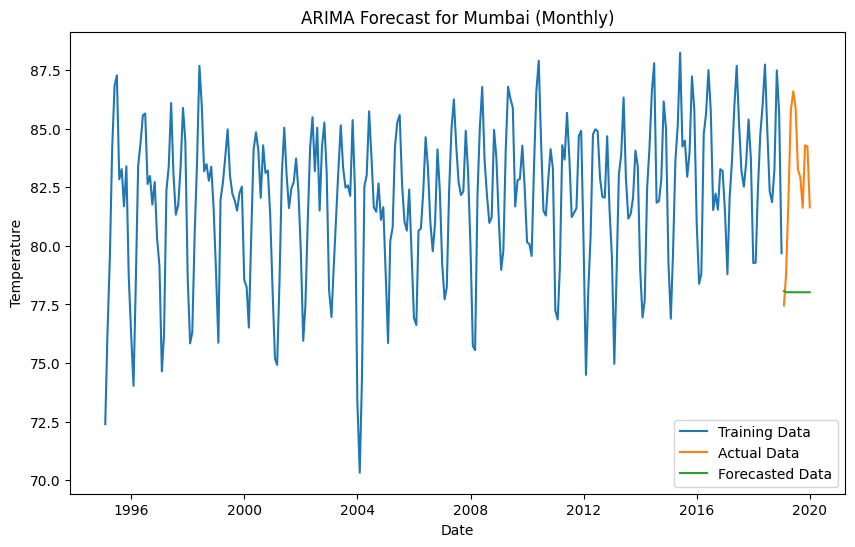

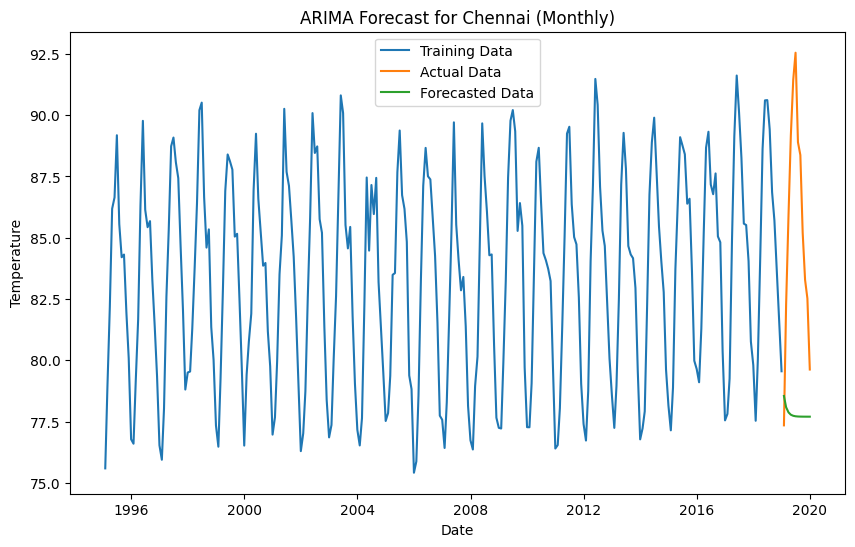

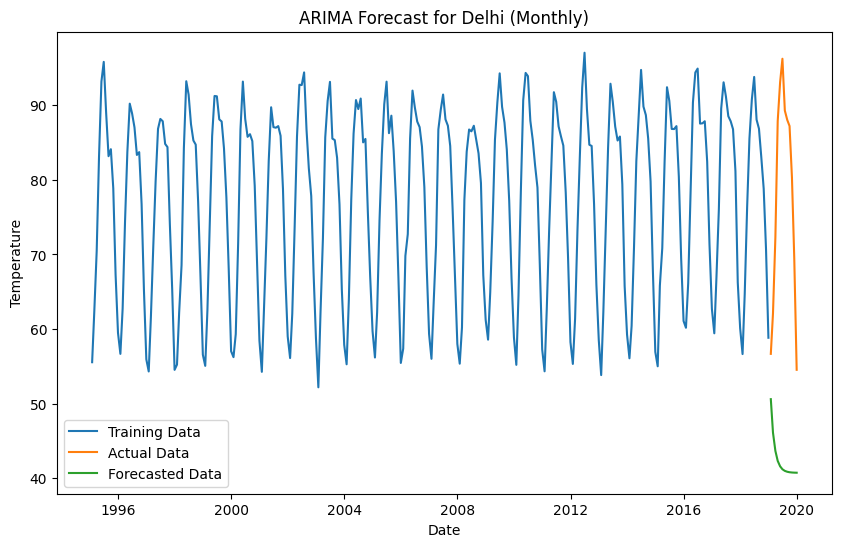

In [39]:
### ARIMA
from statsmodels.tsa.arima.model import ARIMA

### Preprocessing :
temp['date'] = pd.to_datetime(temp[['year', 'month', 'day']])
temp.set_index('date', inplace=True)
temp.sort_index(inplace=True)

# List of cities
cities = ['kolkata', 'mumbai', 'chennai', 'delhi']

# Perform ARIMA forecasting for each city
for city in cities:
    # Select the temperature column for analysis
    temperature = temp[city]

    # Resample the data to monthly frequency
    temperature_monthly = temperature.resample('M').mean()

    # Split the data into training and testing sets
    train_data = temperature_monthly.loc[:'2018']
    test_data = temperature_monthly.loc['2019':]

    # Fit the ARIMA model
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast the temperature for the test period
    forecast = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

    # Plot the actual vs. forecasted temperatures
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Training Data')
    plt.plot(test_data.index, test_data, label='Actual Data')
    plt.plot(test_data.index, forecast, label='Forecasted Data')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(f'ARIMA Forecast for {city.capitalize()} (Monthly)')
    plt.legend(loc='best')
    plt.show()

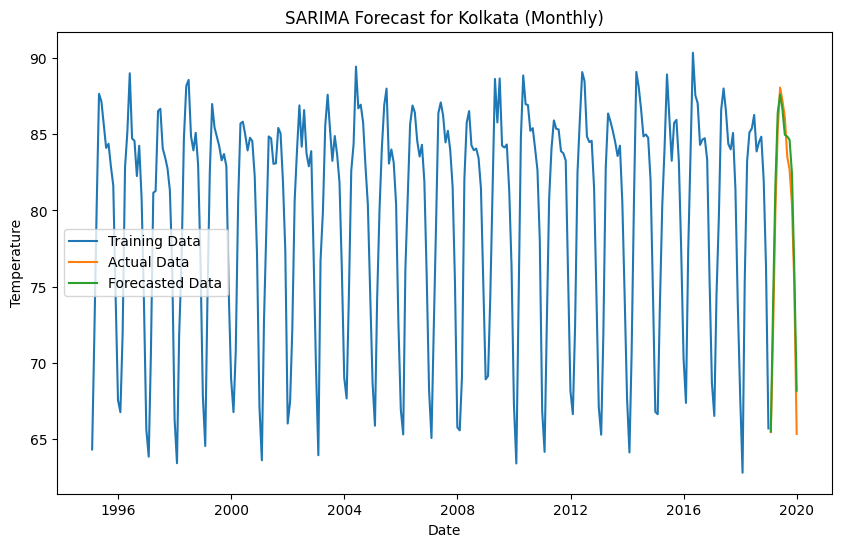

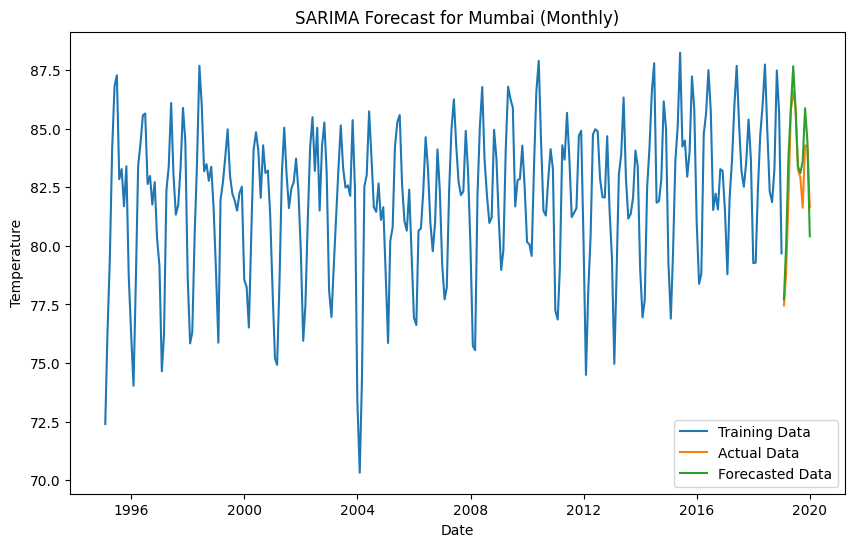

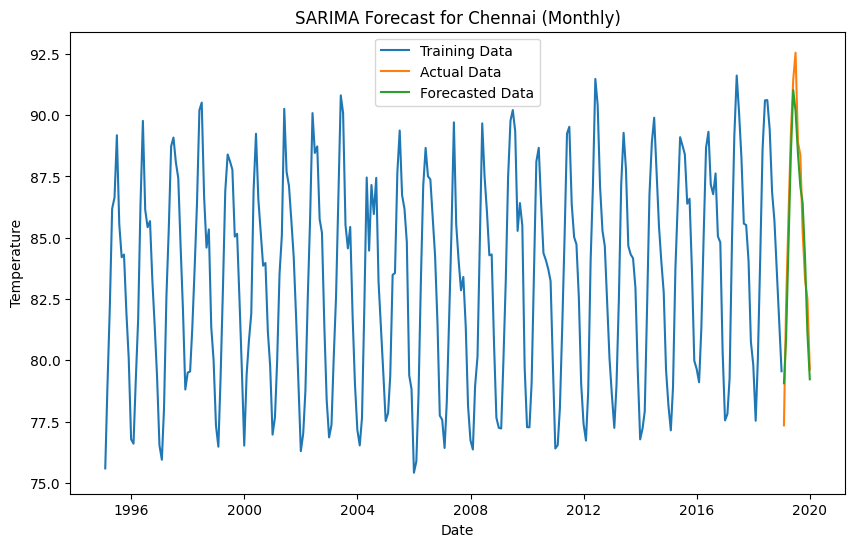

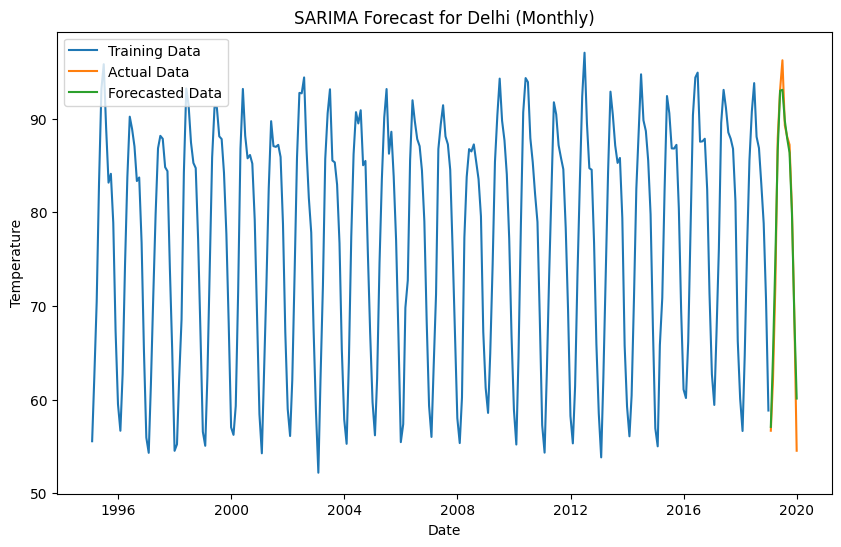

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Perform SARIMA forecasting for each city
for city in cities:
    # Select the temperature column for analysis
    temperature = temp[city]

    # Resample the data to monthly frequency
    temperature_monthly = temperature.resample('M').mean()

    # Split the data into training and testing sets
    train_data = temperature_monthly.loc[:'2018']
    test_data = temperature_monthly.loc['2019':]

    # Define the SARIMA model
    order = (1, 1, 1)  # ARIMA order
    seasonal_order = (1, 1, 1, 12)  # Seasonal order

    # Fit the SARIMA model
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()

    # Forecast the temperature for the test period
    forecast = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

    # Plot the actual vs. forecasted temperatures
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Training Data')
    plt.plot(test_data.index, test_data, label='Actual Data')
    plt.plot(test_data.index, forecast, label='Forecasted Data')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(f'SARIMA Forecast for {city.capitalize()} (Monthly)')
    plt.legend(loc='best')
    plt.show()


Conclusion : Based on the Analysis , both ARIMA and SARIMA models were applied to forecast future temperatures. SARIMA, which incorporates
 seasonality, yielded more accurate forecasts compared to ARIMA. The use of SARIMA models enhanced the understanding of temperature trends
  and facilitated future temperature predictions.